# Backbone Feature Detector - Darknet53
This will be an implementation of the backbonepart of Yolov3. The various comment will guide you into the code, but for a more general understanding of the project i suggest to read the README.md

## Importing the main libraries

In [13]:
# Utility libraries
import os
import random
import matplotlib.pyplot as plt
import cv2

# Core libraries
import numpy as np
import tensorflow as tf

from tensorflow import Tensor
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Conv2D, LeakyReLU, Add, BatchNormalization, GlobalAveragePooling2D, Dense, Softmax, Input


IndentationError: unexpected indent (<ipython-input-13-92fe72203407>, line 14)

In [5]:
# Load the TensorBoard notebook extension (for visualization purposes)
%load_ext tensorboard

## Model designing

### Residual Blocks
First of all, we need to write down the code for the residual blocks used in the Darknet-53, which is a 53 layer deep feature extractor used as a backbone for YOLOv3.

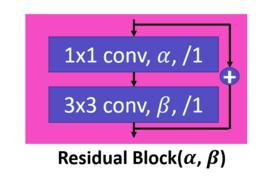

In [16]:
def Conv2D_plus(inputs, filters, kernel_size, stride = 1) -> Tensor:
    X = Conv2D(filters = filters,
                   kernel_size = kernel_size,
                   strides = stride,
                   padding = "same",
                   use_bias = False)(inputs)
    X = BatchNormalization()(X)
    X = LeakyReLU(alpha=0.1)(X)
    return X

def ResidualUnit(inputs, filters_alpha, filters_beta) -> Tensor:
    Y = Conv2D_plus(inputs, filters_alpha, 1)
    Y = Conv2D_plus(Y, filters_beta, 3)
    Y = Add()([Y, inputs])
    return Y

def ResidualBlock(inputs, num_filters, num_block) -> Tensor:
    W = Conv2D_plus(inputs, num_filters, 3, stride = 2)
    for _ in range(num_blocks):
        W = ResidualUnit(W, num_filters // 2, num_filters)
    return W

## Defining the model itself



In [17]:
def Darknet(inputs, classification = False, num_classes = 10):
    Z = Conv2D_plus(inputs, 32, 3)
    Z = ResidualBlock(Z, 64, 1)
    Z = ResidualBlock(Z, 128, 2)
    Z = ResidualBlock(Z, 256, 8)
    Z = ResidualBlock(Z, 512, 8)
    Z = ResidualBlock(Z, 1024, 4)
    if classification:
        Z = GlobalAveragePooling2D()(Z)
        Z = Dense(num_classes)(Z)
        Z = Softmax()(Z)
    darknet = Model(inputs=inputs, outputs=Z, name="mnist_model")
    return darknet

inputs = Input(shape=(416,416,3))
model = Darknet(inputs)

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

## Loading weights
This doesn't seems like it's working, it's ok if you look at https://arxiv.org/pdf/1811.08883.pdf